## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using Python.
- Salary_hike -> Build a prediction model for Salary_hike

In [1]:
#Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
salary_hike_df=pd.read_csv('Salary_Data.csv')

In [3]:
salary_hike_df.head()#viewing top 5 records of Dataframe

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
salary_hike_df.describe().transpose()#Describing the Dataframe to get aggregate

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [5]:
salary_hike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
#EDA
#renaming the columns
salary_hike_df.rename({'YearsExperience': 'YOE'}, axis=1,inplace=True)

In [7]:
#checking for duplicates
salary_hike_df[salary_hike_df.duplicated()].shape

(0, 2)

In [8]:
#Print the duplicated rows
salary_hike_df[salary_hike_df.duplicated()]

,YOE,Salary


In [9]:
salary_hike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOE     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


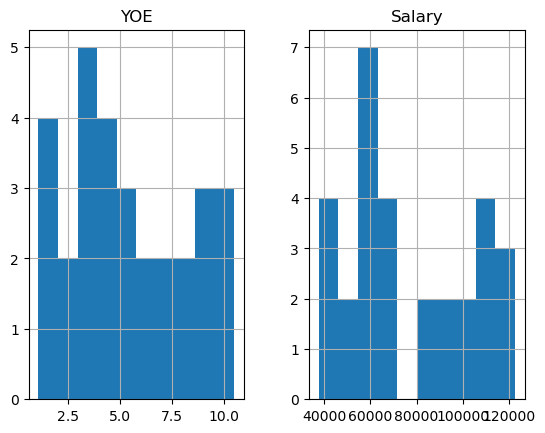

In [10]:
#Checking for Outliers
salary_hike_df.hist()
plt.show()

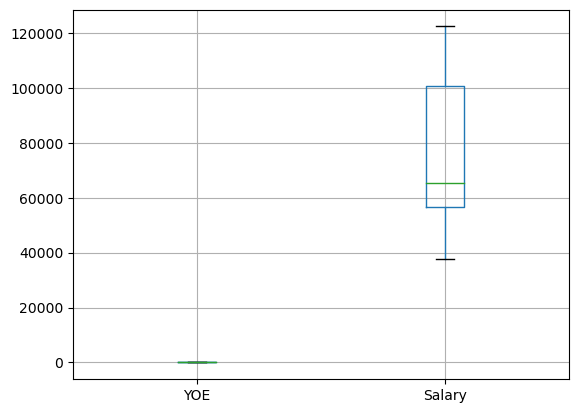

In [11]:
salary_hike_df.boxplot()
plt.show()#No Outliers

## Step 1 : Is there a connection between x and y?

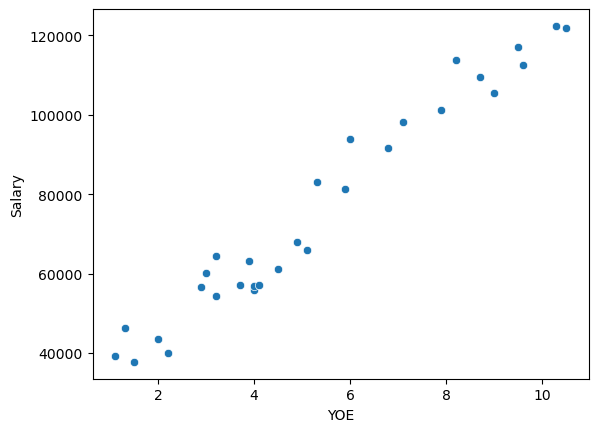

In [12]:
sb.scatterplot(y=salary_hike_df['Salary'] ,x=salary_hike_df['YOE'])
plt.show()

## Step 2: is the relationship linear? - we can find this out using pearson's correlation coffiecient

In [13]:
salary_hike_df.corr()

,YOE,Salary
YOE,1.000000,0.978242
Salary,0.978242,1.000000


## Step 3 : Train the model

In [14]:
salary_hike_model = ols('Salary~YOE',data=salary_hike_df).fit()

In [15]:
salary_hike_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        14:03:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YOE         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
salary_hike_model.params # Model Parameters : B0 and B1

Intercept    25792.200199
YOE           9449.962321
dtype: float64

In [17]:
(salary_hike_model.rsquared,salary_hike_model.rsquared_adj) # R-squared values

(0.9569566641435086, 0.9554194021486339)

## Step 4 : Find Residuals

In [18]:
model_resid = salary_hike_model.resid

In [19]:
def squared_errors(x):
    return x**2

In [20]:
SSE_df=squared_errors(model_resid)
SSE_salary_hike_model=SSE_df.sum()# Sum of Squared errors
SSE_salary_hike_model

938128551.6684291

In [21]:
MSE_salary_hike_model = SSE_salary_hike_model/model_resid.count()
MSE_salary_hike_model

31270951.72228097

In [22]:
RSME_salary_hike_model = np.sqrt(MSE_salary_hike_model)
RSME_salary_hike_model

5592.043608760662

# Residual Analysis

## Mean should be equal to 0

In [23]:
model_resid.mean()

-1.5036979069312415e-11

## Constant Variance

In [24]:
def standardize(x):
    return (x-x.mean())/x.std()

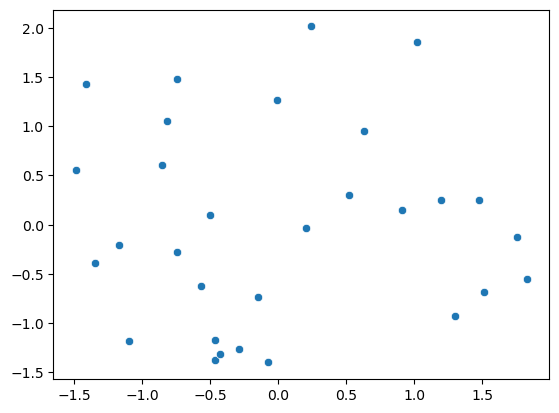

In [25]:
sb.scatterplot(y=standardize(model_resid),x=standardize(salary_hike_model.fittedvalues))
plt.show()

In [26]:
# No Co-variance
pd.concat([pd.DataFrame(standardize(model_resid),columns=['Residue']),pd.DataFrame(standardize(salary_hike_model.fittedvalues),columns=['y_cap_values'])],axis=1).corr()

,Residue,y_cap_values
Residue,1.000000e+00,-3.828355e-16
y_cap_values,-3.828355e-16,1.000000e+00


## Check if residual follow normal distribution

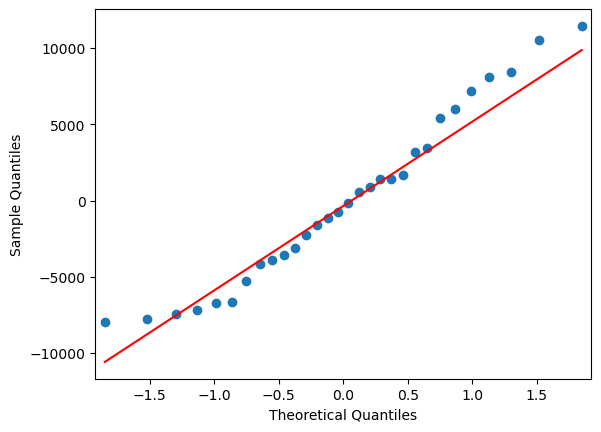

In [27]:
import statsmodels.api as sm
sm.qqplot(model_resid,line='q')
plt.show()

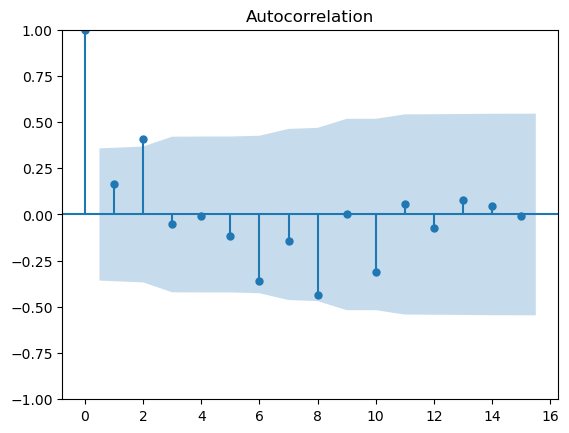

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(model_resid)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

In [29]:
model_influence = salary_hike_model.get_influence()

In [30]:
(c,_)=model_influence.cooks_distance

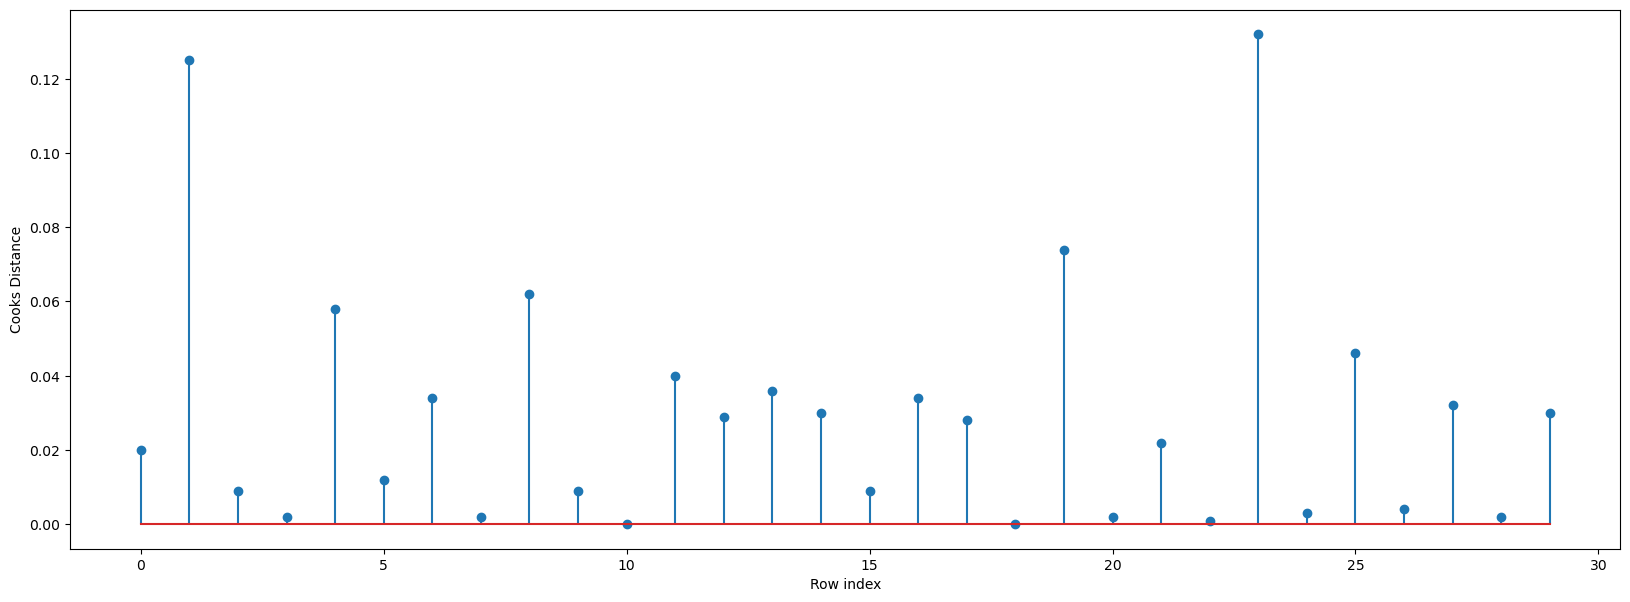

In [31]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(salary_hike_df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [32]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(23, 0.13175452313135222)

## High Influence points

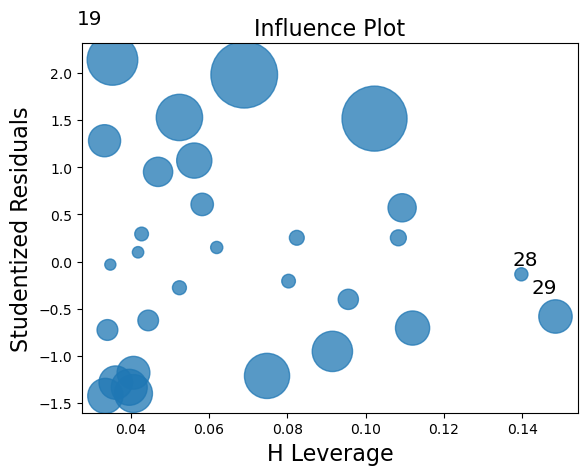

In [33]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(salary_hike_model)
plt.show()

In [34]:
k = salary_hike_df.shape[1]
n = salary_hike_df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

#### From the above plot, it is evident that all data points are with-in leverage cut-off , hence there is no influencers outliers

In [35]:
unseen = pd.DataFrame({'YOE':[2.6,5.6,6.4,7.8,10]})

In [36]:
salary_hike_model.predict(unseen)

0     50362.102234
1     78711.989199
2     86271.959056
3     99501.906306
4    120291.823413
dtype: float64

In [37]:
pd.concat([unseen,pd.DataFrame(salary_hike_model.predict(unseen)).rename({0:'y_predicted'},axis=1)],axis=1)

,YOE,y_predicted
0,2.6,50362.102234
1,5.6,78711.989199
2,6.4,86271.959056
3,7.8,99501.906306
4,10.0,120291.823413
